# Words trends, Sentiment analysis and Topic Modelling

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy

## 1. Processing using NLTK and Spacy (tokenization and lematization)

In [3]:
data = pd.read_csv("data_processed/dataset_nlp.csv", encoding='utf-8')
data.head()

,type,date,texte,source_url,text_processed,date_normalized
0,publication,dimanche 6 avril 2025 à 22h57min,Il fut une époque à Pouni où l’expression « Ke...,https://lefaso.net/spip.php?article137228,il fut une époque à pouni où l’ expression ken...,2025-04-06 22:57:00
1,comment,6 avril 08:22,"Heu, si j’ai bien compris, nos autorités actue...",https://lefaso.net/spip.php?article137228,heu si j’ ai bien compris nos autorités actuel...,2024-04-06 08:22:00
2,comment,6 avril 10:58,Bravo à cet intellectuel de haut vol pour qui ...,https://lefaso.net/spip.php?article137228,bravo à cet intellectuel de haut vol pour qui ...,2024-04-06 10:58:00
3,publication,dimanche 6 avril 2025 à 23h00min,« L’administration de la justice dans un conte...,https://lefaso.net/spip.php?article137236,l’ administration de la justice dans un contex...,2025-04-06 23:00:00
4,publication,jeudi 3 avril 2025 à 23h17min,"(Ouagadougou, 03 avril 2025). Le Président du ...",https://lefaso.net/spip.php?article137191,ouagadougou 03 avril 2025 le président du faso...,2025-04-03 23:17:00


In [4]:
data = data[["type", "date_normalized", "text_processed"]]
data.head()

,type,date_normalized,text_processed
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l’ expression ken...
1,comment,2024-04-06 08:22:00,heu si j’ ai bien compris nos autorités actuel...
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...
3,publication,2025-04-06 23:00:00,l’ administration de la justice dans un contex...
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             15807 non-null  object
 1   date_normalized  15807 non-null  object
 2   text_processed   15803 non-null  object
dtypes: object(3)
memory usage: 370.6+ KB


In [6]:
data.isna().sum()

type               0
date_normalized    0
text_processed     4
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.value_counts("type")

type
comment        9931
reply          3076
publication    2796
Name: count, dtype: int64

In [9]:
data

,type,date_normalized,text_processed
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l’ expression ken...
1,comment,2024-04-06 08:22:00,heu si j’ ai bien compris nos autorités actuel...
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...
3,publication,2025-04-06 23:00:00,l’ administration de la justice dans un contex...
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...
...,...,...,...
15802,reply,2024-02-14 13:51:00,kibora bon résumé de la situation du congo bel...
15803,comment,2024-02-15 12:41:00,kibora messire patrick kibora je ne sais si vo...
15804,publication,2024-02-13 20:45:00,la dégradation de la situation socio-politique...
15805,comment,2024-02-14 20:34:00,tous les pays toutes les organisations qui ont...


In [10]:
# Removing special characters
data["text_processed"] = data["text_processed"].apply(lambda df: re.sub(r"([^\w\s])", " ", df))
data

,type,date_normalized,text_processed
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...
1,comment,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...
3,publication,2025-04-06 23:00:00,l administration de la justice dans un contex...
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...
...,...,...,...
15802,reply,2024-02-14 13:51:00,kibora bon résumé de la situation du congo bel...
15803,comment,2024-02-15 12:41:00,kibora messire patrick kibora je ne sais si vo...
15804,publication,2024-02-13 20:45:00,la dégradation de la situation socio politique...
15805,comment,2024-02-14 20:34:00,tous les pays toutes les organisations qui ont...


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Removing stopswords
stop_words = set(stopwords.words('french'))
#others_stop_words = ["cette", "ça", "faut", "va", "a", "tous", "toutes", "là"]
#stop_words.update(others_stop_words)
print(f"les stopwords: {stop_words}")
data["text_processed_w_stpw"] = data["text_processed"].apply(lambda line: ' '.join([word for word in line.split() if word not in stop_words]))

les stopwords: {'avec', 'ayantes', 'ou', 'ces', 'eu', 'qu', 'aient', 'fus', 'et', 'étants', 'eûtes', 'avais', 'même', 'sois', 'eurent', 'notre', 'fussent', 'me', 'le', 'ayants', 'étant', 'des', 'eusses', 'vos', 'fusses', 'n', 'on', 'leur', 'seront', 'serais', 'en', 'il', 't', 'eut', 'ton', 'furent', 'la', 'eusse', 'eus', 'un', 's', 'te', 'serons', 'étantes', 'nos', 'aies', 'seras', 'fussiez', 'serait', 'eux', 'étée', 'étiez', 'auraient', 'avaient', 'ils', 'aurais', 'pour', 'aurons', 'eussions', 'tes', 'auriez', 'du', 'ta', 'sur', 'vous', 'aie', 'ayant', 'lui', 'de', 'eue', 'étées', 'serai', 'aurions', 'eussent', 'eûmes', 'aura', 'avons', 'ce', 'une', 'avions', 'seriez', 'ai', 'mon', 'aurai', 'les', 'sa', 'suis', 'son', 'est', 'aux', 'par', 'qui', 'tu', 'eussiez', 'soyez', 'étaient', 'au', 'sont', 'êtes', 'ayons', 'avait', 'fûtes', 'se', 'l', 'elle', 'fut', 'étante', 'fusse', 'aurez', 'as', 'ayante', 'mes', 'votre', 'moi', 'ma', 'été', 'ses', 'pas', 'était', 'étions', 'ont', 'ayez', 'm'

In [14]:
data.head()

,type,date_normalized,text_processed,text_processed_w_stpw
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...,époque pouni où expression ken you aton vogue ...
1,comment,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...,heu si bien compris autorités actuelles souhai...
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...,bravo cet intellectuel haut vol génétique a pl...
3,publication,2025-04-06 23:00:00,l administration de la justice dans un contex...,administration justice contexte transition que...
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...,ouagadougou 03 avril 2025 président faso chef ...


In [ ]:
!python -m spacy download fr_core_news_sm

In [16]:
nlp = spacy.load("fr_core_news_sm")

In [17]:
data["comment_process_spacy"] = data["text_processed_w_stpw"].apply(lambda col: nlp(col))
data.head()

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.3 MB 1.3 MB/s eta 0:00:13
     ---------------------------------------- 0.0/16.3 MB 1.3 MB/s eta 0:00:13
     --------------------------------------- 0.1/16.3 MB 435.7 kB/s eta 0:00:38
     --------------------------------------- 0.1/16.3 MB 581.0 kB/s eta 0:00:28
     --------------------------------------- 0.1/16.3 MB 581.0 kB/s eta 0:00:28
     --------------------------------------- 0.1/16.3 MB 532.5 kB/s eta 0:00:31
     --------------------------------------- 0.2/16.3 MB 538.9 kB/s eta 0:00:30
     --------------------------------------- 0.2/16.3 MB 483.6 kB/s eta 0:00:34
      -------------------------------------- 0.3/16.3 MB 654.7 kB/s eta 0:00:25
      -------------------------------------- 0.3/16.3 MB 654.1 kB/s eta 0:00:25
      -------------------------------------- 0.4/16.3 MB 754.1 kB/s eta 0:00:22
     - ------------------------------------- 0.6/1

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...,époque pouni où expression ken you aton vogue ...,"(époque, pouni, où, expression, ken, you, aton..."
1,comment,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...,heu si bien compris autorités actuelles souhai...,"(heu, si, bien, compris, autorités, actuelles,..."
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...,bravo cet intellectuel haut vol génétique a pl...,"(bravo, cet, intellectuel, haut, vol, génétiqu..."
3,publication,2025-04-06 23:00:00,l administration de la justice dans un contex...,administration justice contexte transition que...,"(administration, justice, contexte, transition..."
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...,ouagadougou 03 avril 2025 président faso chef ...,"(ouagadougou, 03, avril, 2025, président, faso..."


In [20]:

data["lemetized_tokens"] = data["comment_process_spacy"].apply(lambda tokens: [token.lemma_ for token in tokens])
data.head()

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy,lemetized_tokens,cleanned_text
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...,époque pouni où expression ken you aton vogue ...,"(époque, pouni, où, expression, ken, you, aton...","[époque, pouni, où, expression, ken, you, aton...","['époque', 'pouni', 'où', 'expression', 'ken',..."
1,comment,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...,heu si bien compris autorités actuelles souhai...,"(heu, si, bien, compris, autorités, actuelles,...","[heu, si, bien, comprendre, autorité, actuel, ...","['heu', 'si', 'bien', 'comprendre', 'autorité'..."
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...,bravo cet intellectuel haut vol génétique a pl...,"(bravo, cet, intellectuel, haut, vol, génétiqu...","[bravo, ce, intellectuel, haut, vol, génétique...","['bravo', 'ce', 'intellectuel', 'haut', 'vol',..."
3,publication,2025-04-06 23:00:00,l administration de la justice dans un contex...,administration justice contexte transition que...,"(administration, justice, contexte, transition...","[administration, justic, contexte, transition,...","['administration', 'justic', 'contexte', 'tran..."
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...,ouagadougou 03 avril 2025 président faso chef ...,"(ouagadougou, 03, avril, 2025, président, faso...","[ouagadougou, 03, avril, 2025, président, faso...","['ouagadougou', '03', 'avril', '2025', 'présid..."


In [21]:
data["cleanned_text"] = data["lemetized_tokens"].astype(str)
data

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy,lemetized_tokens,cleanned_text
0,publication,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...,époque pouni où expression ken you aton vogue ...,"(époque, pouni, où, expression, ken, you, aton...","[époque, pouni, où, expression, ken, you, aton...","['époque', 'pouni', 'où', 'expression', 'ken',..."
1,comment,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...,heu si bien compris autorités actuelles souhai...,"(heu, si, bien, compris, autorités, actuelles,...","[heu, si, bien, comprendre, autorité, actuel, ...","['heu', 'si', 'bien', 'comprendre', 'autorité'..."
2,comment,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...,bravo cet intellectuel haut vol génétique a pl...,"(bravo, cet, intellectuel, haut, vol, génétiqu...","[bravo, ce, intellectuel, haut, vol, génétique...","['bravo', 'ce', 'intellectuel', 'haut', 'vol',..."
3,publication,2025-04-06 23:00:00,l administration de la justice dans un contex...,administration justice contexte transition que...,"(administration, justice, contexte, transition...","[administration, justic, contexte, transition,...","['administration', 'justic', 'contexte', 'tran..."
4,publication,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...,ouagadougou 03 avril 2025 président faso chef ...,"(ouagadougou, 03, avril, 2025, président, faso...","[ouagadougou, 03, avril, 2025, président, faso...","['ouagadougou', '03', 'avril', '2025', 'présid..."
...,...,...,...,...,...,...,...
15802,reply,2024-02-14 13:51:00,kibora bon résumé de la situation du congo bel...,kibora bon résumé situation congo belge ex zaïre,"(kibora, bon, résumé, situation, congo, belge,...","[kibora, bon, résumé, situation, congo, belge,...","['kibora', 'bon', 'résumé', 'situation', 'cong..."
15803,comment,2024-02-15 12:41:00,kibora messire patrick kibora je ne sais si vo...,kibora messire patrick kibora sais si grand co...,"(kibora, messire, patrick, kibora, sais, si, g...","[kibora, messir, patrick, kibora, savoir, si, ...","['kibora', 'messir', 'patrick', 'kibora', 'sav..."
15804,publication,2024-02-13 20:45:00,la dégradation de la situation socio politique...,dégradation situation socio politique sénégal ...,"(dégradation, situation, socio, politique, sén...","[dégradation, situation, socio, politique, sén...","['dégradation', 'situation', 'socio', 'politiq..."
15805,comment,2024-02-14 20:34:00,tous les pays toutes les organisations qui ont...,tous pays toutes organisations pouvoir faire p...,"(tous, pays, toutes, organisations, pouvoir, f...","[tout, pays, tout, organisation, pouvoir, fair...","['tout', 'pays', 'tout', 'organisation', 'pouv..."


## 2. Words Trends

In [22]:
# Using TF-IDF for mesuring the importance of words
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vectorizer = TfidfVectorizer(max_features=1000)

tfid_matrix = vectorizer.fit_transform(data["cleanned_text"])

In [83]:
mots_importants = vectorizer.get_feature_names_out()
mots_importants

array(['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18',
       '20', '2015', '2021', '2022', '2023', '2024', '2025', '21', '24',
       '25', '26', '30', '50', 'abord', 'accepter', 'accompagner',
       'accord', 'accorder', 'accès', 'acquérir', 'acte', 'acteur',
       'action', 'activité', 'actuel', 'actuellement', 'adapter',
       'administration', 'adopter', 'ae', 'affaire', 'affirmer', 'afin',
       'africain', 'afriqu', 'afrique', 'agence', 'agent', 'agir',
       'agricole', 'aide', 'aider', 'ailleurs', 'aimer', 'ainsi',
       'ajouter', 'algérie', 'alimentaire', 'aller', 'alliance', 'alors',
       'ambassadeur', 'ami', 'amélioration', 'améliorer', 'américain',
       'an', 'analyse', 'ancien', 'annoncer', 'année', 'août',
       'apparaître', 'appel', 'appeler', 'apporter', 'apprendre', 'appui',
       'après', 'argent', 'arme', 'armé', 'armée', 'arriver', 'arrêter',
       'art', 'article', 'artiste', 'assez', 'association', 'assurer',
       'atelier', 

In [84]:
import numpy as np
scores = np.sum(tfid_matrix.toarray(), axis=0)

In [85]:
# Liste personnalisée de stopwords à exclure
stopwords_perso = {
    'pay', 'sou',
    # Auxiliaires & verbes fréquents
    'être', 'avoir', 'faire', 'pouvoir', 'vouloir', 'falloir', 'devoir', 'mettre', 'prendre', 'dire', 'donner', 'venir',
    'aller', 'voir', 'savoir', 'passer', 'laisser', 'permettre', 'entrer', 'apparaître', 'créer', 'devenir',
    
    # Pronoms, déterminants
    'ce', 'cela', 'celui', 'dont', 'leur', 'lui', 'elle', 'eux', 'il', 'ils', 'on', 'nous', 'vous', 'tu', 'te', 'se',
    
    # Adverbes / connecteurs
    'aussi', 'encore', 'déjà', 'bien', 'très', 'plus', 'moins', 'même', 'toujours', 'jamais', 'souvent', 'parfois',
    'alors', 'ainsi', 'donc', 'puis', 'ensuite', 'enfin', 'lorsque', 'quand', 'où', 'comment', 'combien', 'parce',
    'trop', 'peu', 'non', 'oui', 'là', 'ici', 'tout', 'rien', 'chaque', 'aucun', 'autre', 'quel',
    
    # Conjonctions
    'et', 'ou', 'mais', 'or', 'car', 'ni', 'si', 'que', 'qu\'il', 'qu\'elle', 'quand', 'comme', 'puisque', 'bien que',
    
    # Noms peu informatifs (souvent génériques ou creux dans le contexte)
    'chose', 'personne', 'année', 'temps', 'jour', 'monde', 'grand', 'petit', 'nouveau', 'ancien', 'projet', 'cas',
    'niveau', 'moyen', 'part', 'moment', 'exemple', 'cas', 'point', 'rôle', 'type', 'valeur', 'forme', 'sens',
    
    # Divers
    'depuis', 'sans', 'avec', 'dans', 'sur', 'sous', 'entre', 'par', 'vers', 'pour', 'contre', 'avant', 'après', 'selon',
    'validée', 'vide', 'paragraphe', 'ligne', 'ainsi', 'également', 'comme'

}

In [86]:
# Filtrer les mots importants
mots_scores = sorted(
    [(mot, score) for mot, score in zip(mots_importants, scores) if mot.lower() not in stopwords_perso],
    key=lambda x: x[1], reverse=True
)
# Affichage des 30 mots les plus importants
for mot, score in mots_scores[:30]:
    print(f"{mot}: {score:.3f}")


burkina: 432.481
pays: 402.625
bon: 356.422
faso: 330.381
peuple: 313.527
président: 278.872
celer: 249.609
burkinabè: 248.687
état: 247.443
certain: 231.446
politique: 228.994
ministre: 222.342
france: 222.011
africain: 217.775
merci: 217.139
premier: 214.802
cedeao: 199.782
dieu: 197.178
national: 195.825
ae: 192.536
etat: 191.431
militaire: 183.035
an: 174.180
pourquoi: 172.987
beaucoup: 172.650
vraiment: 172.173
gouvernement: 167.935
simplement: 166.754
responsable: 165.147
transition: 161.906


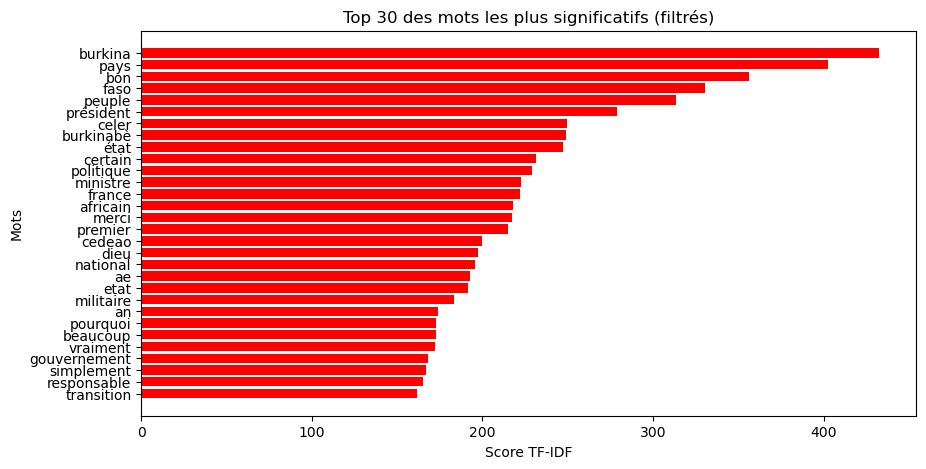

In [87]:
# Visualisation
import matplotlib.pyplot as plt
mots_top, scores_top = zip(*mots_scores[:30])
plt.figure(figsize=(10, 5))
plt.barh(mots_top, scores_top, color='red')
plt.xlabel("Score TF-IDF")
plt.ylabel("Mots")
plt.title("Top 30 des mots les plus significatifs (filtrés)")
plt.gca().invert_yaxis()
plt.show()

In [90]:
# On garde tous les mots importants et leurs scores dans un DataFrame
df_mots_scores = pd.DataFrame(mots_scores, columns=["mot", "score"])

df_mots_scores.to_csv("data_processed/mots_tendance.csv", index=False, encoding="utf-8")

## 3. Sentiment analysis

In [23]:
df = data[["date_normalized", "text_processed", "text_processed_w_stpw", "cleanned_text"]]
df.head()

,date_normalized,text_processed,text_processed_w_stpw,cleanned_text
0,2025-04-06 22:57:00,il fut une époque à pouni où l expression ken...,époque pouni où expression ken you aton vogue ...,"['époque', 'pouni', 'où', 'expression', 'ken',..."
1,2024-04-06 08:22:00,heu si j ai bien compris nos autorités actuel...,heu si bien compris autorités actuelles souhai...,"['heu', 'si', 'bien', 'comprendre', 'autorité'..."
2,2024-04-06 10:58:00,bravo à cet intellectuel de haut vol pour qui ...,bravo cet intellectuel haut vol génétique a pl...,"['bravo', 'ce', 'intellectuel', 'haut', 'vol',..."
3,2025-04-06 23:00:00,l administration de la justice dans un contex...,administration justice contexte transition que...,"['administration', 'justic', 'contexte', 'tran..."
4,2025-04-03 23:17:00,ouagadougou 03 avril 2025 le président du faso...,ouagadougou 03 avril 2025 président faso chef ...,"['ouagadougou', '03', 'avril', '2025', 'présid..."


### 3.1 Sentiment analysis Using finetuned model

In [ ]:
!pip install transformers

In [51]:
from transformers import pipeline

pipe = pipeline("text-classification",
                model="cardiffnlp/twitter-xlm-roberta-base-sentiment",
                tokenizer="cardiffnlp/twitter-xlm-roberta-base-sentiment",
                truncation=True,
                max_length=512)

Device set to use cpu


In [63]:
def le_sentiment(data_set):
  sentiments = []
  for i in range(0, len(data_set)):
    posts = data_set["text_processed_w_stpw"]
    for post in posts:
      try:
        if not isinstance(post, str) or not post.strip():
            print("EMPTY")
            sentiments.append("EMPTY")
            continue
        
        result = pipe(post)
        label = result[0]['label']
        
        if label == 'positive':
            sentiments.append(1)
        elif label == 'negative':
            sentiments.append(-1)
        elif label == 'neutral':
            sentiments.append(0)
        else:
            print("UNKNOWN")
            sentiments.append("UNKNOWN")
      except Exception as e:
        print(f"[ERROR] {e}")
        sentiments.append("ERROR")

  data_set['sentiment'] = sentiments[:len(data_set)]
  data_set.to_csv("data_processed/data_sentiment_finetuned_m.csv", encoding='utf-8')


In [63]:
le_sentiment(df)

### 3.2 Sentiment analysis using VADER

In [55]:
! pip install vader-multi #Versoin étandu de VADER prenant en compte le vocabulaire francais

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 3.6 MB/s eta 0:00:00


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

modele = SentimentIntensityAnalyzer()

In [32]:
# Test
# Exemple de phrases
textes = [
    "J'adore ce produit, il est incroyable ! 😍",
    "Ce film est vraiment mauvais... 😡",
    "Pas mal, mais je m'attendais à mieux.",
    "C'est le meilleur jour de ma vie !!! 🎉",
    "Je suis très déçu, quelle perte de temps.",
    "vraiment vous êtes bon"
]
for texte in textes:
    score = modele.polarity_scores(texte)
    print(f"Texte: {texte}")
    print(f"Score: {score}")
    print("-" * 50)

Texte: J'adore ce produit, il est incroyable ! 😍
Score: {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.831}
--------------------------------------------------
Texte: Ce film est vraiment mauvais... 😡
Score: {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.5849}
--------------------------------------------------
Texte: Pas mal, mais je m'attendais à mieux.
Score: {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.698}
--------------------------------------------------
Texte: C'est le meilleur jour de ma vie !!! 🎉
Score: {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.8306}
--------------------------------------------------
Texte: Je suis très déçu, quelle perte de temps.
Score: {'neg': 0.469, 'neu': 0.531, 'pos': 0.0, 'compound': -0.7346}
--------------------------------------------------
Texte: vraiment vous êtes bon
Score: {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.4877}
--------------------------------------------------


In [35]:
def le_sentiment (texte, model):
    try:
        # Vérifie que le texte est une chaîne non vide
        if not isinstance(texte, str) or not texte.strip():
            return "EMPTY"

        # Limiter la longueur pour éviter les erreurs de requêtes
        if len(texte) > 500:
            texte = texte[:500]
            
        result = 0
        score = model.polarity_scores(texte)
        
        if (score['compound'] <= -0.5):
            result = -1
        elif (score['compound'] > -0.5 and score['compound'] <= 0.5) :
            result = 0
        else:
            result = 1

        return result
    except Exception as e:
        print(f"[Exception]: Erreur lors de l'analyse de sentiment: {e}")
        return "ERROR"

    

In [ ]:
df["sentiment"] = df["text_processed_w_stpw"].apply(lambda line: le_sentiment(line, modele))

In [ ]:
df.to_csv("datas_sentiment_VADER.csv", encoding='utf-8', index=False)